In [ ]:
import cv2
import numpy as np
import os
import string
# Create the directory structure
if not os.path.exists("datap"):
    os.makedirs("datap")

directory = 'datap/'
cap = cv2.VideoCapture(0)
interrupt = -1  

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Getting count of existing images
    count = len(os.listdir(directory))
    
    # Printing the count in each set to the screen
    # cv2.putText(frame, "MODE : "+mode, (10, 50), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "IMAGE COUNT", (10, ), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "Count : "+str(count), (10, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)

    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (220-1, 9), (620+1, 419), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[10:410, 220:520]
    
    cv2.imshow("Frame", frame)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(5,5),2)
    
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, test_image = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    test_image = cv2.resize(test_image, (300,300))
    cv2.imshow("test", test_image)
        
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('c'):
        cv2.imwrite(directory+str(count)+'.jpg', roi)
    
cap.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
import os
import csv
from image_processing import func
if not os.path.exists("datapp"):
    os.makedirs("datapp")
pathtest="datap"
path1 = "datapp"

for(direcpath,direcnames,files) in os.walk(pathtest):
    for file in files:
        actual_path=pathtest+"/"+file
        actual_path2=path1+"/"+file
        img = cv2.imread(actual_path, 0)
        bw_image = func(actual_path)
        cv2.imwrite(actual_path2 , bw_image)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf

To Load the model for use

In [ ]:
bring_model = tf.keras.models.load_model("/content/drive/MyDrive/CNN_OG_New_Dataset_7_Epochs_More_Pattern.h5")

For using a folder of images

In [ ]:
import cv2
import glob

image = [cv2.imread(image) for image in glob.glob("/content/drive/MyDrive/datapp/*")]


In [ ]:
images=[]
for i in range(len(image)):
  img2= cv2.cvtColor(image[i], cv2.COLOR_BGR2GRAY)

  print(img2.shape)
  images.append(img2)

TypeError: ignored

(400, 300)

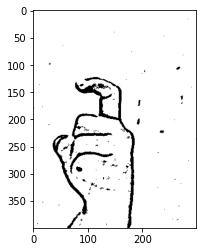

In [ ]:
plt.imshow(images[0],cmap='gray')
images[0].shape

In [ ]:
def get_alpha(val):
    names = {'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,}
    for key, value in names.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

In [ ]:
len(images)

(200, 200)

In [ ]:
type(images[0])

numpy.ndarray

In [ ]:
for i in range(len(images)):
    images[i] = images[i].astype("float32")

In [ ]:
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (128, 128), interpolation = cv2.INTER_AREA) / 255.0

In [ ]:
images = np.asarray(images)

In [ ]:
y_pred = bring_model.predict(images)
labels_pred = []
for i in range(len(y_pred)):
    labels_pred.append( get_alpha(np.argmax(y_pred[i])))

In [ ]:
labels_pred

['7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '1',
 '9',
 '9',
 '9',
 '1',
 '7',
 '1',
 '1',
 '1',
 '7',
 '8',
 '1',
 '1',
 '1',
 '1',
 '7',
 '1',
 '8',
 '1',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '4',
 '7',
 '4',
 '7',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '7',
 '7',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8'